In [1]:
!pip install pywavelets opencv-python matplotlib

  Using cached opencv_python-4.12.0.88-cp37-abi3-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (19 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 9.5 MB/s  0:00:00m eta 0:00:01
Using cached opencv_python-4.12.0.88-cp37-abi3-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (67.0 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [opencv-python]0m [opencv-python]


In [2]:
import cv2
import pywt
import matplotlib.pyplot as plt
import numpy as np


In [5]:
# caminho da imagem
img_path = "/home/lucas/mestrado/tapi_inrid/A. Segmentation/1. Original Images/a. Training Set/IDRiD_01.jpg"   # troque pelo seu arquivo

# ler imagem
img = cv2.imread(img_path)

# BGR -> RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# converter para grayscale
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)


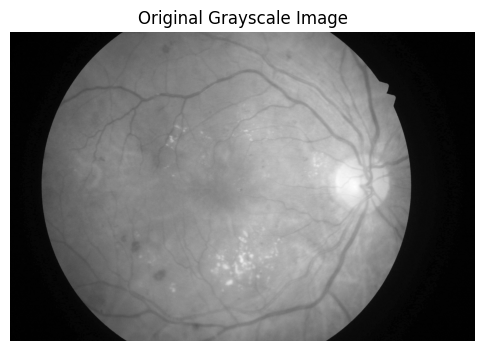

In [7]:
#plot original image
plt.figure(figsize=(6,6))
plt.imshow(gray, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')
plt.show()

In [8]:
# wavelet escolhida
wavelet = 'db2'  # teste também 'haar'

# decomposição
coeffs = pywt.dwt2(gray, wavelet)

LL, (LH, HL, HH) = coeffs


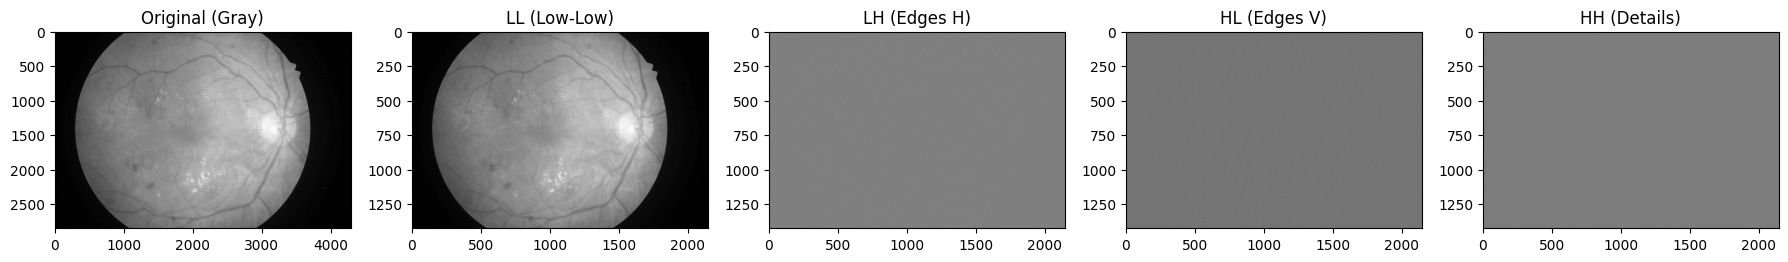

In [10]:
fig, axes = plt.subplots(1, 5, figsize=(18, 4))

axes[0].imshow(gray, cmap='gray')
axes[0].set_title("Original (Gray)")
axes[0].axis("on")

axes[1].imshow(LL, cmap='gray')
axes[1].set_title("LL (Low-Low)")
axes[1].axis("on")

axes[2].imshow(LH, cmap='gray')
axes[2].set_title("LH (Edges H)")
axes[2].axis("on")

axes[3].imshow(HL, cmap='gray')
axes[3].set_title("HL (Edges V)")
axes[3].axis("on")

axes[4].imshow(HH, cmap='gray')
axes[4].set_title("HH (Details)")
axes[4].axis("on")

plt.tight_layout()
plt.show()


In [11]:
coeffs2 = pywt.wavedec2(gray, wavelet, level=2)

LL2 = coeffs2[0]
(LH2, HL2, HH2) = coeffs2[1]


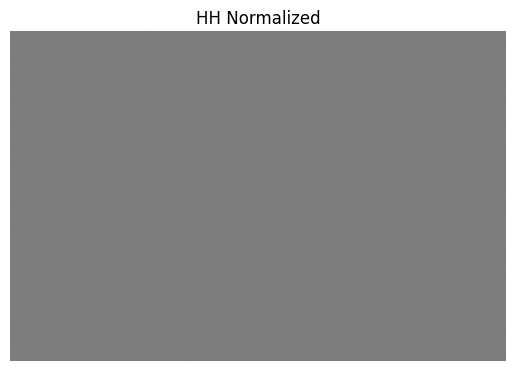

In [12]:
def norm(x):
    return (x - x.min()) / (x.max() - x.min() + 1e-8)

plt.imshow(norm(HH), cmap='gray')
plt.title("HH Normalized")
plt.axis("off")
plt.show()
